**Introdução e Técnicas de Processamento de Texto**

Na aula de hoje, veremos o que é Processamento de Linguagem Natural, alguns exemplos de aplicações e quais as principais técnicas de pré-processamento de texto. Durante a aula, mesclaremos conteúdo teórico e prático usando Jupyter Notebook a fim de entendermos e praticarmos sobre o conteúdo proposto.

Introdução

O campo de processamento de linguagem natural (NLP) passou por uma mudança dramática nos últimos anos, tanto em termos de metodologia quanto em termos de aplicativos suportados. Os avanços metodológicos têm variado desde novas formas de representar documentos a novas técnicas de síntese de linguagem. Com eles, surgiram novos aplicativos que vão desde sistemas de conversação abertos até técnicas que usam linguagem natural para a interpretabilidade do modelo. Por fim, esses avanços permitiram que a NLP ganhasse espaço em áreas relacionadas, como visão computacional e sistemas de recomendação. Este último será objeto de estudo nosso futuramente.

Num sentido amplo, Processamento de Linguagem Natural (NLP) trata de qualquer tipo de manipulação computacional de linguagem natural, desde uma simples contagem de frequências de palavras para comparar diferentes estilos de escrita, até o “entendimento” completo de interações humanas (pelo menos no sentido de oferecer uma resposta útil a eles).

As tecnologias baseadas em NLP estão se tornando cada vez mais pervasivas e, diante das interfaces homem-máquina mais naturais e meios mais sofisticados de armazenamento de informações, o processamento de linguagem tem alcançado um papel central numa sociedade da informação multilíngue.

Por conta disso, NLP está rapidamente se tornando uma habilidade necessária exigida por engenheiros, gerentes de produto, cientistas, estudantes e entusiastas que desejam construir aplicativos com base em dados de linguagem natural. Por um lado, novas ferramentas e bibliotecas, para NLP e aprendizado de máquina tornaram a modelagem de linguagem natural mais acessível do que nunca. Mas, por outro lado, os recursos para aprender NLP devem visar esse público diversificado e sempre crescente.

Como dito, NLP permite interação com sistemas computacionais em linguagem humana. Entretanto, computadores entendem apenas dados binários, por exemplo, 0 e 1.

Para exemplificar o quão importante NLP se tornou em nossa vida, aqui vão algumas aplicações:

Plataformas de e-mail usam NLP para classificar mensagens (spam ou legítimas), priorização na caixa de entrada e auto-complete;
Assistentes baseados em voz, tais como Amazon Alexa, Apple Siri, Google Assistant ou Microsoft Cortana são baseados em técnicas de NLP para interagir com os usuários, entende-los e responde-los corretamente;
Plataformas de busca (Search engine), como Google ou Bing, usam NLP para entendimento de query (informação que o usuário digitou), recuperação da informação e ranqueamento, para citar alguns;
Tradução de máquina, como o Google Translate, é construído em cima de técnicas de NLP
Além disso, NLP pode ser usado em uma variedade de campos, como jurídico, saúde, varejo, atendimento, marketing e outros.

Mas modelar problemas de NLP não é uma tarefa trivial, pelo contrário, é bem desafiador. Vamos ver dois exemplos. O primeiro é usado em sistemas de busca:

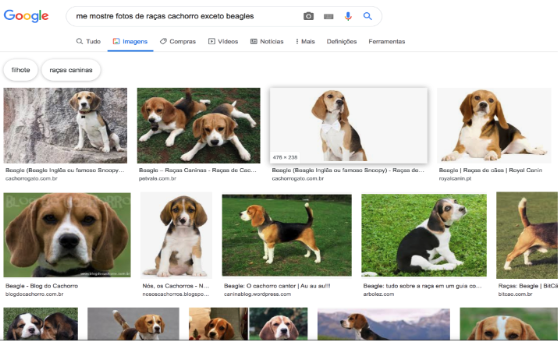

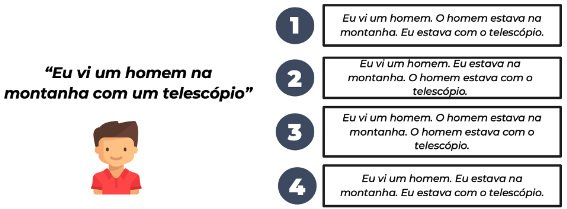

**Pipeline de NLP**

Quando falamos de NLP, geralmente usamos técnicas de Machine Learning. Elas são aplicadas a dados textuais da mesma maneira que são usadas em outros tipos de dados, como imagens ou dados estruturados.

Toda abordagem de Machine Learning para NLP, seja ela supervisionada ou não supervisionada, pode ser descrita em três passos comuns:

- Extrair features de um texto.
- Usar uma representação dessas features para aprender um modelo.
- Avaliar e melhorar o modelo.

De maneira mais geral, precisamos de mais algumas etapas. O diagrama abaixo apresenta um pipeline genérico para NLP:

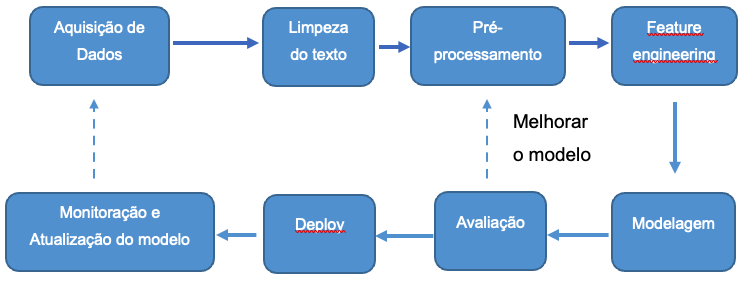

# Técnicas de pré-processamento

Primeiro passo -> extrair features de um texto

Porém, primeiramente, precisamos pré-processar o texto e convertê-lo em formato numérico, para que os modelos de ML entendam a informação.

## Tokenização dos dados

É a primeira etapa, consiste em transformar textos em números. Os tipos de n-grama são definidos pela quantidade de elementos que os compõem. Unigramas (N = 1), Bigramas (N = 2) e Trigramas (N = 3).

A ideia é splitar o texto de acordo com caractere espaço.

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({
    'text':
        ['Eu gosto de assistir jogos de futebol',
         'Já eu, prefiro assistir jogos de basquete']
})

df.head()

,text
0,Eu gosto de assistir jogos de futebol
1,"Já eu, prefiro assistir jogos de basquete"


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.text)
text_vect = vect.fit_transform(df.text)

In [6]:
print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).T.to_string())

          0  1
assistir  1  1
basquete  0  1
de        2  1
eu        1  1
futebol   1  0
gosto     1  0
jogos     1  1
já        0  1
prefiro   0  1


0 = primeira frase
1 = segunda frase

valores = contagem de vezes que a palavra aparece na frase

In [7]:
# CountVectorizer bigrama, analisa palavras em dupla uma ao lado da outra
vect = CountVectorizer(ngram_range=(2,2))
vect.fit(df.text)
text_vect = vect.fit_transform(df.text)
print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).T.to_string())

# CountVectorizer trigrama, analisa palavras em trio uma ao lado da outra
vect = CountVectorizer(ngram_range=(3,3))
vect.fit(df.text)
text_vect = vect.fit_transform(df.text)
print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).T.to_string())

                  0  1
assistir jogos    1  1
de assistir       1  0
de basquete       0  1
de futebol        1  0
eu gosto          1  0
eu prefiro        0  1
gosto de          1  0
jogos de          1  1
já eu             0  1
prefiro assistir  0  1
                        0  1
assistir jogos de       1  1
de assistir jogos       1  0
eu gosto de             1  0
eu prefiro assistir     0  1
gosto de assistir       1  0
jogos de basquete       0  1
jogos de futebol        1  0
já eu prefiro           0  1
prefiro assistir jogos  0  1


Para realizar a tokenização, podemos implementar uma solução própria ou usar a biblioteca NLTK. NLTK, ou Natural Language Toolkit, é uma plataforma para construir programas em Python para trabalhar com dados de linguagem humana. Vamos usá-la para realizar a maioria das tarefas de pré-processamento que compõe o pipeline de transformação de dados textuais.

In [8]:
import nltk
#nltk.download()

In [9]:
from nltk.tokenize import word_tokenize
exemplo = 'O futebol brasileiro é o melhor do mundo. Você concorda?'
words = word_tokenize(exemplo)
words

['O',
 'futebol',
 'brasileiro',
 'é',
 'o',
 'melhor',
 'do',
 'mundo',
 '.',
 'Você',
 'concorda',
 '?']

### Regex

In [10]:
import re

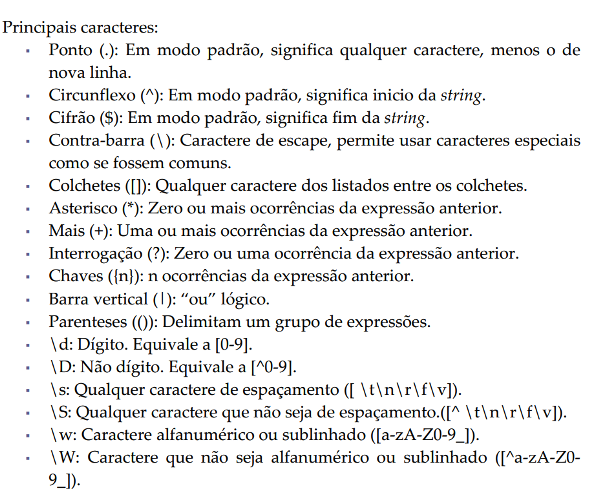

In [11]:
reg = re.compile('\w+')
bandas = 'Jota Quest, Aerosmith & Pink Floyd'
bandas_select = reg.findall(bandas)
print(bandas_select)


['Jota', 'Quest', 'Aerosmith', 'Pink', 'Floyd']


In [12]:
phone_num = '22-33-55 # This is my phone'
num = re.sub('#.*$','',phone_num)
print(num)

num = re.sub(r'\D','',phone_num)
print(num)

22-33-55 
223355


### Stopwords

Adicionalmente à tokenização e ao regex, temos as stop-words. Quando lemos um texto, percebemos que algumas palavras sempre aparecem, mas elas não contribuem para uma interpretação mais sólida de uma frase. Tais palavras são chamadas “stop-words”. Normalmente, são artigos, advérbios, preposições, conectivos e até alguns verbos.

Geralmente, quando nos deparamos com um texto, optamos por remover tais palavras, fazendo com que nosso modelo se concentre no que, de fato, é importante dentro de uma frase. Tecnicamente falando, estamos reduzindo o espaço de características.

In [13]:
nltk.corpus.stopwords.words('portuguese')

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

Geralmente, quando nos deparamos com um texto, optamos por remover tais palavras, fazendo com que nosso modelo se concentre no que, de fato, é importante dentro de uma frase. Tecnicamente falando, estamos reduzindo o espaço de características.

### Outras técnicas

Palavras com mesma representação formológica

- Normalização: considerar todas letras e palavras como letra minúscula;
- Lematização: considerar a raíz das palavras. Tempo verbal -:> "Foi" e "será" têm origem na palavra "é"; 

Para entendermos o funcionamento dessas três técnicas, vamos analisar as seguintes frases:

- "O carro que estava quebrado voltou a funcionar."

- "Meu carro quebrou e não está funcionando."

1. Vetorização dos dados. Coverter palavras em números

In [14]:
frase1 = "O carro que estava quebrado voltou a funcionar"
frase2 = "Meu carro quebrou e não está funcionando"

print(word_tokenize(frase1))
print(word_tokenize(frase2))

['O', 'carro', 'que', 'estava', 'quebrado', 'voltou', 'a', 'funcionar']
['Meu', 'carro', 'quebrou', 'e', 'não', 'está', 'funcionando']


In [15]:
df = pd.DataFrame({'text':[frase1, frase2]})
df

,text
0,O carro que estava quebrado voltou a funcionar
1,Meu carro quebrou e não está funcionando


In [19]:
vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.text)
text_vect = vect.transform(df.text)

print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).T.to_string())

             0  1
carro        1  1
estava       1  0
está         0  1
funcionando  0  1
funcionar    1  0
meu          0  1
não          0  1
que          1  0
quebrado     1  0
quebrou      0  1
voltou       1  0


In [20]:
# Lista de stopwords
stops = nltk.corpus.stopwords.words('portuguese')

In [21]:
vect = CountVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df.text)
text_vect = vect.transform(df.text)

# DF limpo de stopwords
print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).T.to_string())

             0  1
carro        1  1
funcionando  0  1
funcionar    1  0
quebrado     1  0
quebrou      0  1
voltou       1  0


- Funcionar = funcionando, funcionar
- Quebrar = quebrado, quebrou

Alternativas: **stemming** e **lemmatization**

In [24]:
from nltk.stem import WordNetLemmatizer

examples = ['go','going','goes','gone','went']

wnl = WordNetLemmatizer()

for word in examples:
    print(wnl.lemmatize(word, 'v'))

go
go
go
go
go


In [26]:
# Reduz palavras até uma raíz comum. Não funciona muito bem no português
from nltk.stem import PorterStemmer

examples = ['go','going','goes','gone','went']

ps = PorterStemmer()

for word in examples:
    print(ps.stem(word, 'v'))

go
go
goe
gone
went


In [28]:
# Alternativa melhor -> RSLPStemmer. Ainda não é ideal
from nltk.stem.rslp import RSLPStemmer

examples = ['conecta','conectado','conectamos','desconectados','conectividade','conexão']

rslp = RSLPStemmer()

for word in examples:
    print(rslp.stem(word))

conect
conect
conect
desconect
conect
conex


In [30]:
stem1 = ' '.join([rslp.stem(x) for x in word_tokenize(frase1)])
stem2 = ' '.join([rslp.stem(x) for x in word_tokenize(frase2)])

In [31]:
df = pd.DataFrame({'text':[stem1, stem2]})
df

,text
0,o carr que est quebr volt a funcion
1,meu carr quebr e não est funcion


In [32]:
vect = CountVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df.text)
text_vect = vect.transform(df.text)

# DF limpo de stopwords
print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).T.to_string())

         0  1
carr     1  1
est      1  1
funcion  1  1
quebr    1  1
volt     1  0


# POS-Tagger

POS-Tagging é uma ferramenta usada no processamento de linguagem natural (NLP), que permite que os algoritmos entendam a estrutura gramatical de uma frase e desambiguam palavras que têm vários significados.

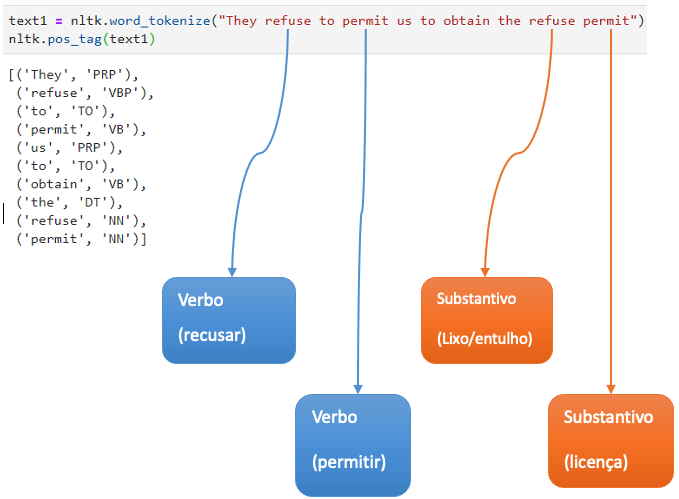

In [33]:
text1 = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text1)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

Com o POS-Tagging é possível encontrar palavras que pertençam à mesma classe gramatical.

In [34]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
print(text)

<Text: the fulton county grand jury said friday an...>


In [36]:
print(text.similar('woman'))
print(text.similar('football'))

man time day year car moment world house family child country boy
state job place way war girl work word
None
interest day last national month figure ball yankee character fiction
the grand said that in committee term judge have practices
None


Com isso, conseguimos treinar um tagger para taguear palavras novas. Entretanto, NLTK não possui suporte nativo ao português, mas é possível fazer o download de um Corpus para resolver nosso problema.

Aqui, vamos usar o Corpus Floresta. O projeto Floresta Sintá(c)tica é uma colaboração entre a Linguateca e o projecto VISL. 

Contém textos em português (do Brasil e de Portugal) anotados (analisados) automaticamente pelo analisador sintático PALAVRAS e revistos por linguistas. Mais informações podem ser obtidas nesse link

In [37]:
from nltk.corpus import floresta
floresta.tagged_words()

# Dicionário de tags: https://www.linguateca.pt/Floresta/

[('Um', '>N+art'), ('revivalismo', 'H+n'), ...]

In [40]:
def simplify_tag(x):
    if '+' in x:
        return x.split('+')[1]
    return x

twords = floresta.tagged_words()
twords = [(w.lower(), simplify_tag(x)) for (w,x) in twords]

In [41]:
twords[:10]

[('um', 'art'),
 ('revivalismo', 'n'),
 ('refrescante', 'adj'),
 ('o', 'art'),
 ('7_e_meio', 'prop'),
 ('é', 'v-fin'),
 ('um', 'art'),
 ('ex-libris', 'n'),
 ('de', 'prp'),
 ('a', 'art')]

## Default Tagger

Atribui a tag mais comum do corpus para todas as palavras.

In [42]:
# n = tag mais frequente *substantivo)
tags = [tag for (word,tag) in twords]
nltk.FreqDist(tags).max()

'n'

In [43]:
raw = 'Esse é meu time de futebol'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('n')
default_tagger.tag(tokens)

[('Esse', 'n'),
 ('é', 'n'),
 ('meu', 'n'),
 ('time', 'n'),
 ('de', 'n'),
 ('futebol', 'n')]

In [44]:
tsents = floresta.tagged_sents()
tsents = [[(w.lower(), simplify_tag(x)) for (w,x) in sent] for sent in tsents if sent]
train = tsents[1000:]
test = tsents[:1000]
tsents[:3]

[[('um', 'art'), ('revivalismo', 'n'), ('refrescante', 'adj')],
 [('o', 'art'),
  ('7_e_meio', 'prop'),
  ('é', 'v-fin'),
  ('um', 'art'),
  ('ex-libris', 'n'),
  ('de', 'prp'),
  ('a', 'art'),
  ('noite', 'n'),
  ('algarvia', 'adj'),
  ('.', '.')],
 [('é', 'v-fin'),
  ('uma', 'num'),
  ('de', 'prp'),
  ('as', 'art'),
  ('mais', 'adv'),
  ('antigas', 'adj'),
  ('discotecas', 'n'),
  ('de', 'prp'),
  ('o', 'art'),
  ('algarve', 'prop'),
  (',', ','),
  ('situada', 'v-pcp'),
  ('em', 'prp'),
  ('albufeira', 'prop'),
  (',', ','),
  ('que', 'pron-indp'),
  ('continua', 'v-fin'),
  ('a', 'prp'),
  ('manter', 'v-inf'),
  ('os', 'art'),
  ('traços', 'n'),
  ('decorativos', 'adj'),
  ('e', 'conj-c'),
  ('as', 'art'),
  ('clientelas', 'n'),
  ('de', 'prp'),
  ('sempre', 'adv'),
  ('.', '.')]]

In [46]:
# Acurácia muito baixa
tagger_default = nltk.DefaultTagger('n')
print(tagger_default.accuracy(test))

0.17800040072129833


## Unigram tagger

aseia em frequência estatística da classe gramatical mais vezes atribuída a uma palavra.

Em outras palavras, o Unigram Tagger estabelece a tag mais provável, por olhar para uma palavra, encontrar suas diferentes funções sintáticas dentro do Corpus, pegar aquela cuja recorrência seja máxima e atribuir essa tag para ocorrências dessa palavra no conjunto de teste.

In [47]:
tagger_unigram = nltk.UnigramTagger(train)
print(tagger_unigram.accuracy(test))

0.8522139851733119


## N-gram tagger

O conceito de Unigram Tagger pode ser generalizado para N-gram Tagger. O N-gram Tagger possui um contexto que é definido pelo token atual em conjunto com as tags dos n-1 tokens antecedentes. Observe a imagem abaixo:

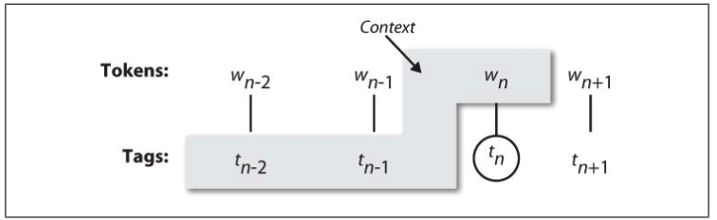

In [52]:
tagger_ngram = nltk.BigramTagger(train)
print(tagger_ngram.accuracy(test))

0.14626327389300742


Resultados ruins pois estamos detalhando cada vez mais o contexto, trabalhando com número muito grande de possibilidades ao considerar uma sequencia de N-palavras

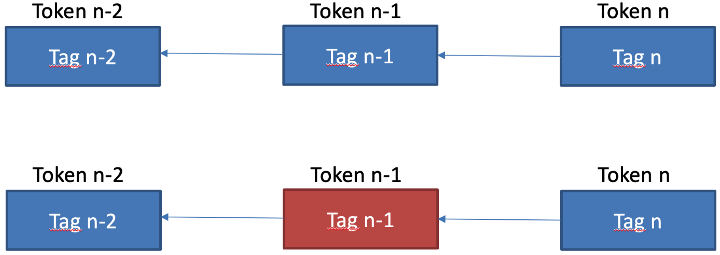

Como consequência, existe um trade-off entre acurácia e a cobertura dos resultados (relacionado com o trade-off de precision/recall em recuperação de informação).

Uma maneira de resolver o trade-off entre acurácia e cobertura é utilizar o algoritmo com melhor acurácia que temos, mas retornar a algoritmos com maior cobertura quando necessário.

Por exemplo, podemos combinar o resultado de um Bigram Tagger, Unigram Tagger e Default Tagger da seguinte maneira:

Tente taguear o token com o Bigram Tagger.

Se ele falhar, tente usar Unigram Tagger.

Se ele também falhar, use o Default Tagger.

Para isso, usamos o conceito de backoff quando declaramos um Tagger.

In [54]:
tagger_unigram = nltk.UnigramTagger(train, backoff=tagger_default)
print(tagger_unigram.accuracy(test))

tagger_ngram = nltk.BigramTagger(train, backoff=tagger_unigram)
print(tagger_ngram.accuracy(test))

0.8740532959326788
0.8900420757363254


### Salvando tagger

In [55]:
from pickle import dump, load

In [56]:
output = open('tagger.pkl', 'wb')
dump(tagger_ngram, output, -1)
output.close()

In [57]:
input = open('tagger.pkl', 'rb')
tagger = load(input)
input.close()

In [60]:
text1 = "Isso é para você."
text2 = "Moro em um país tropical"
tokens1 = text1.split()
tokens2 = text2.split()
print('text1: ',tagger.tag(tokens1))
print('text2: ',tagger.tag(tokens2))

text1:  [('Isso', 'n'), ('é', 'v-fin'), ('para', 'prp'), ('você.', 'n')]
text2:  [('Moro', 'n'), ('em', 'prp'), ('um', 'art'), ('país', 'n'), ('tropical', 'adj')]
